In [32]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [33]:
data = pd.read_csv('iris_flower.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [36]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [37]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

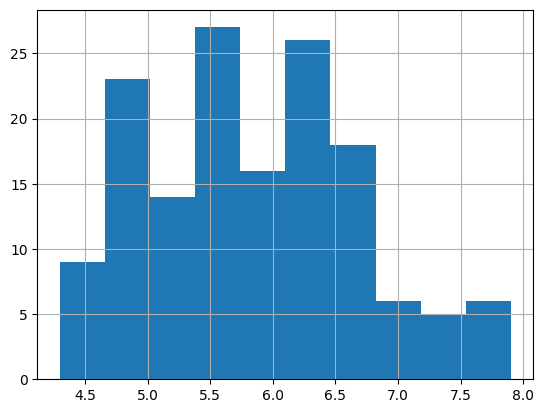

In [38]:
data['sepal_length'].hist()

<Axes: >

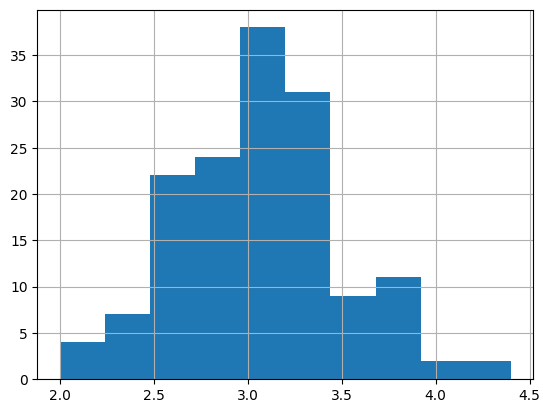

In [39]:
 data['sepal_width'].hist()

<Axes: >

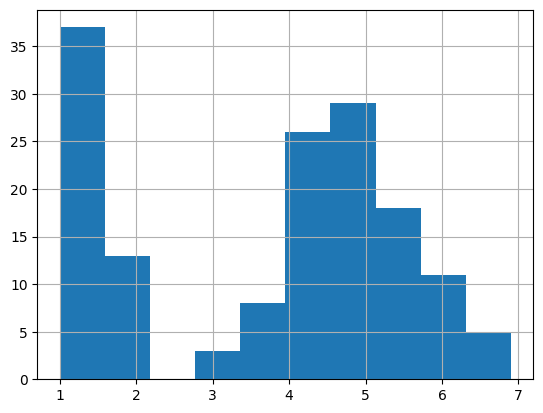

In [40]:
data['petal_length'].hist()

<Axes: >

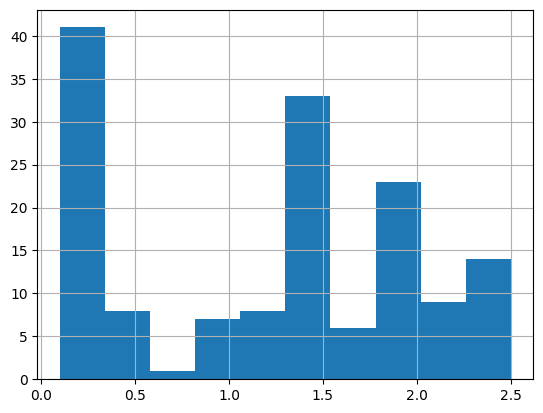

In [41]:
data['petal_width'].hist()

In [42]:
color = ['red','blue','green']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

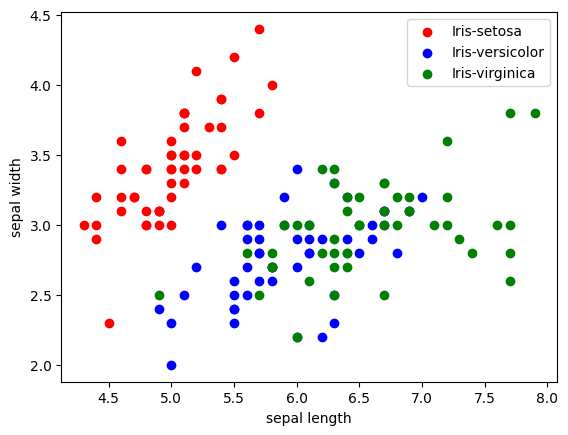

In [43]:
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c = color[i],label = species[i])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

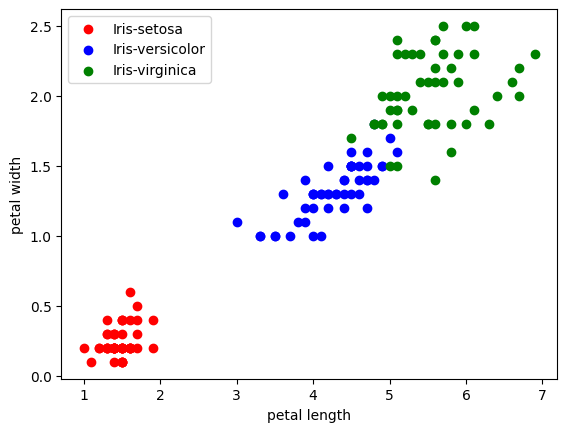

In [44]:
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c = color[i],label = species[i])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

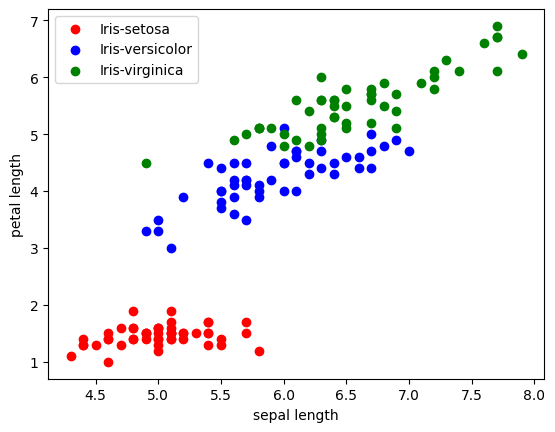

In [45]:
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c = color[i],label = species[i])
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()

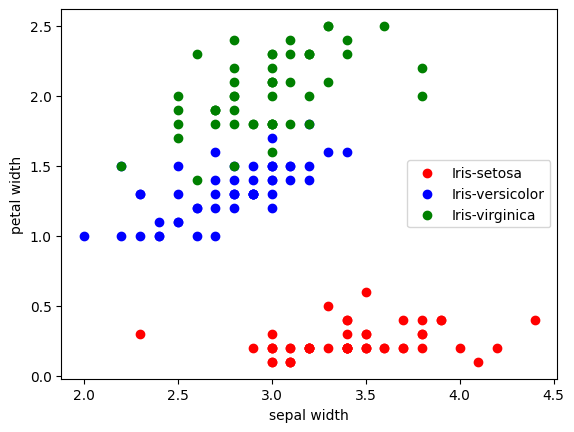

In [46]:
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c = color[i],label = species[i])
plt.xlabel('sepal width')
plt.ylabel('petal width')
plt.legend()

In [47]:
numeric_data = data.select_dtypes(include=[np.number])
numeric_data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

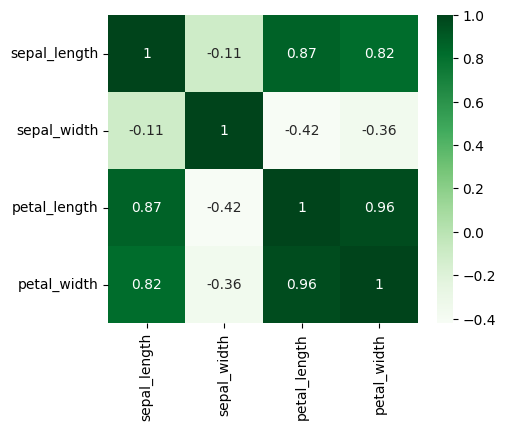

In [48]:
corr = numeric_data.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'Greens')

In [49]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['species'])
Y = data['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [50]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [51]:
model.fit(x_train, y_train)

LogisticRegression()

In [52]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [53]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [54]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [55]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [56]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


In [57]:
import pickle
filename = 'irismodel.sav'
pickle.dump(model, open(filename, 'wb'))

In [58]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
129,7.2,3.0,5.8,1.6
142,5.8,2.7,5.1,1.9
40,5.0,3.5,1.3,0.3
80,5.5,2.4,3.8,1.1
12,4.8,3.0,1.4,0.1


In [59]:
load_model = pickle.load(open(filename,'rb'))

In [60]:
load_model.predict([[6.0, 2.2, 4.0, 1.0]])

array(['Iris-versicolor'], dtype=object)